Import Data


In [ ]:
import pandas as pd

dataset = pd.read_excel('drive/MyDrive/dataset/price_phone.xlsx')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Initial Explore

In [ ]:
print("Info Dataset")
print(dataset.info())
print()
print("Missing Value")
print(dataset.isnull().sum())
print()
print("Analisis Deskriptf Data")
print(dataset.describe())

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  


Labeling Data

In [ ]:
import numpy as np
import pandas as pd

dataset['price_range'].head()
rules = [
    dataset['price_range'] == 1,
    dataset['price_range'] == 2,
    dataset['price_range'] == 3
]
cond = [
    'Low Price',
    'Normal',
    'Expensive'
]
dataset['price_labeled'] = np.select(rules,cond, default="Cheap")
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_labeled
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,Low Price
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,Normal
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,Normal
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,Normal
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,Low Price


Distribusi Data Label




Text(0.5, 1.0, 'Distribusi Y')

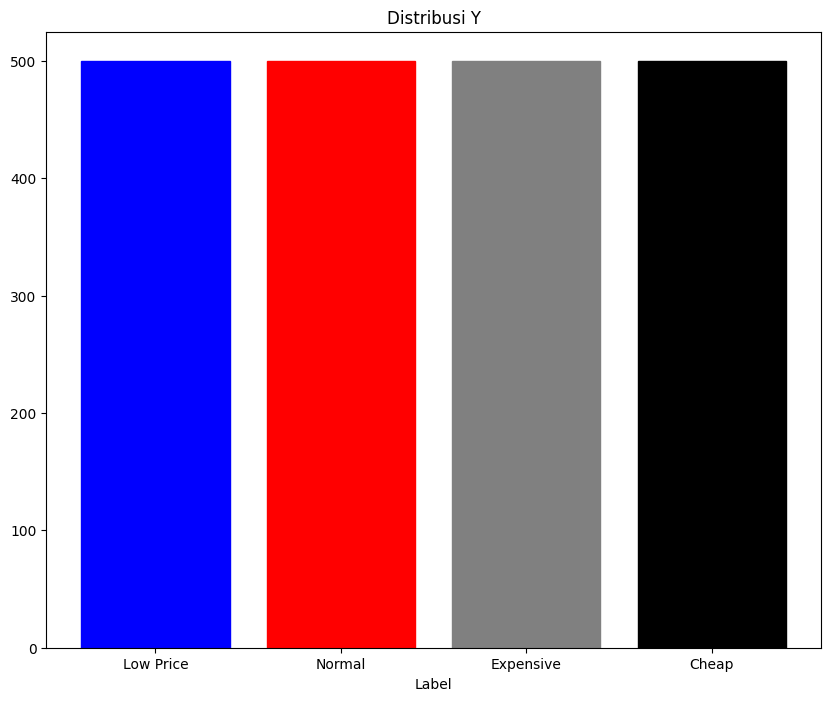

In [ ]:
import matplotlib.pyplot as plt

label = dataset['price_labeled'].unique()
# label
y = []
for item in label:
  var = dataset['price_labeled'].str.contains(item, case=False).sum()
  var = int(var)
  y.append(var)

fig, ax = plt.subplots(figsize=(10,8))
colors = [
    'blue',
    'red',
    'grey',
    'black'
]

chart = plt.bar(label, y)
for index, bar in enumerate(chart):
  bar.set_color(colors[index])
ax.set_xlabel('Label')
ax.set_title('Distribusi Y')


Distribusi Data Numerik

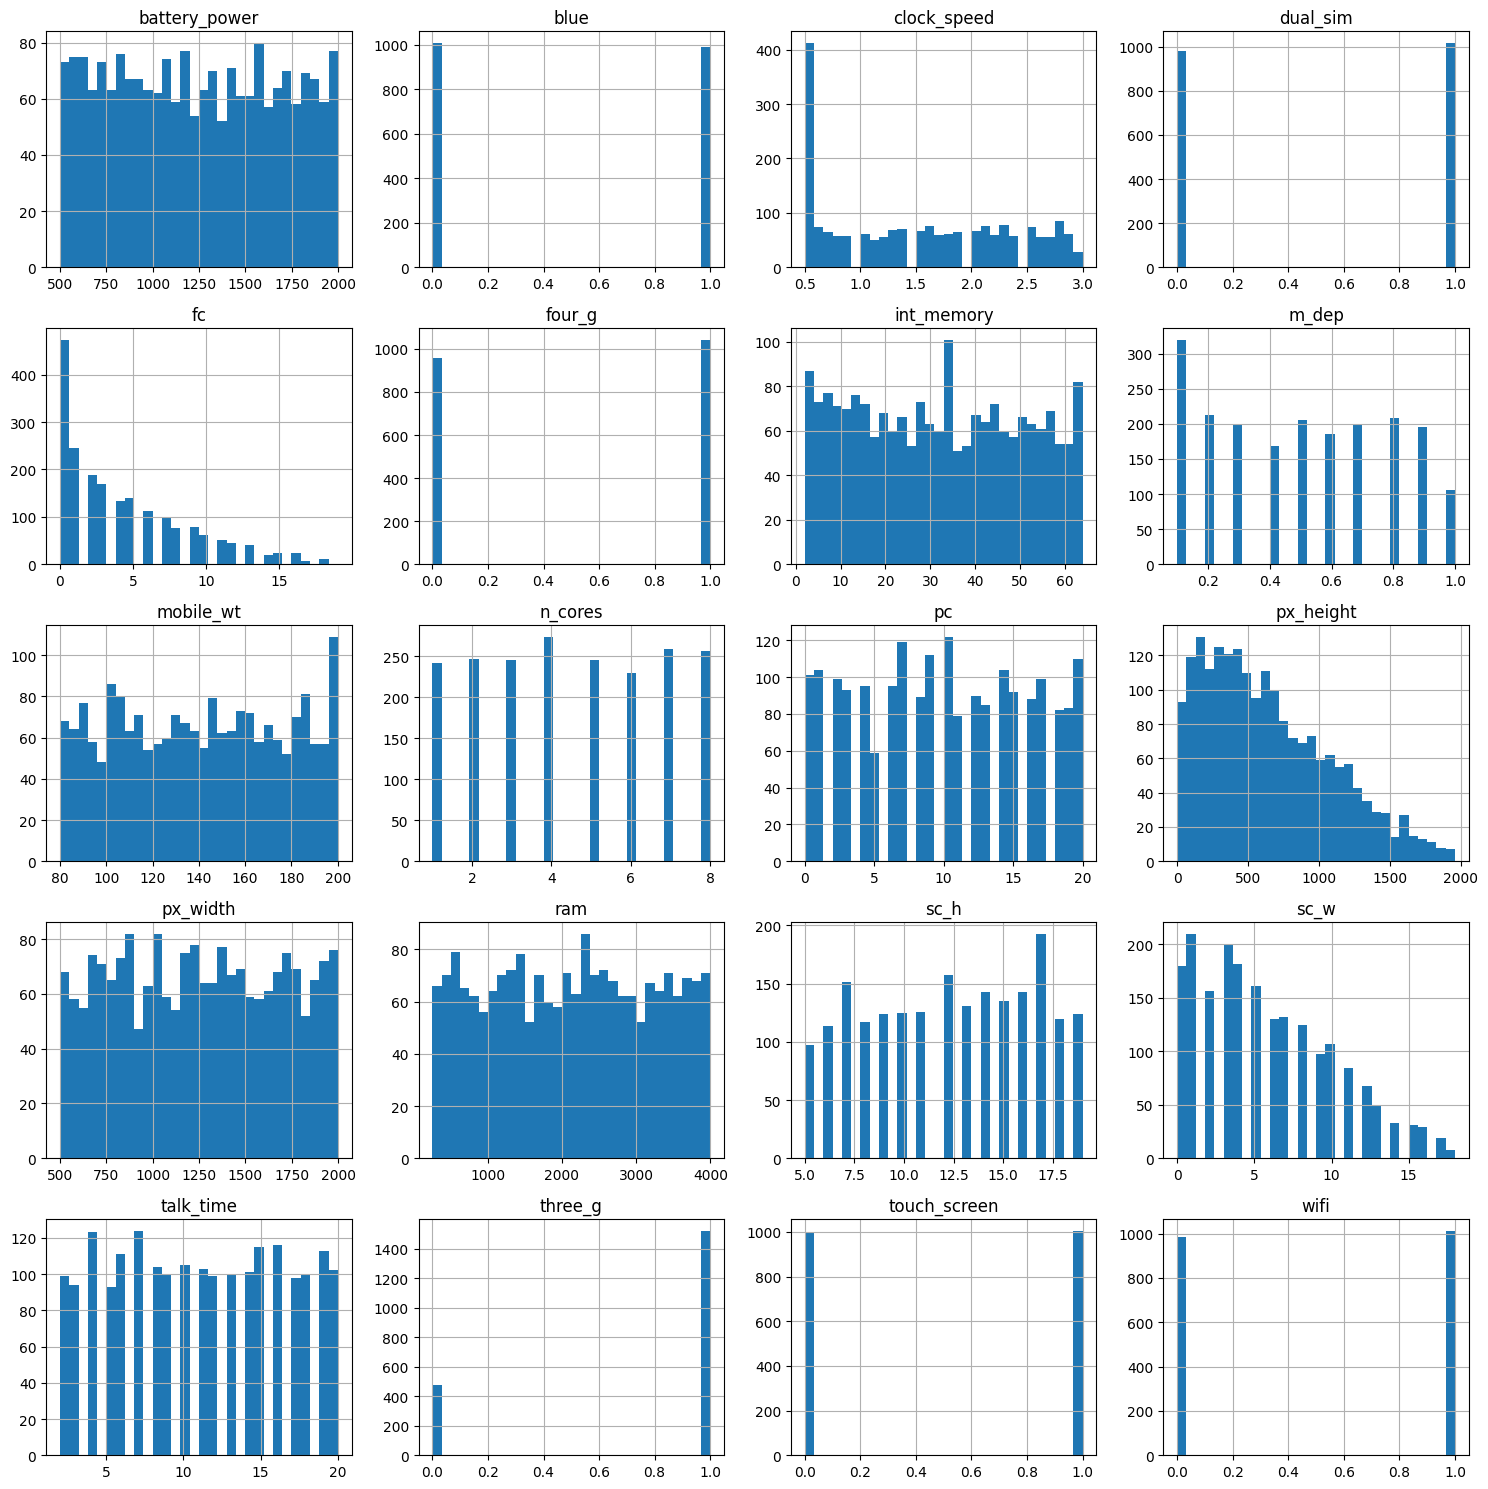

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_num = dataset.drop(columns={"price_range", "price_labeled"})
data_num.hist(bins=30, figsize=(15,15))
plt.tight_layout()
plt.show()

Korelasi Variabel Independen

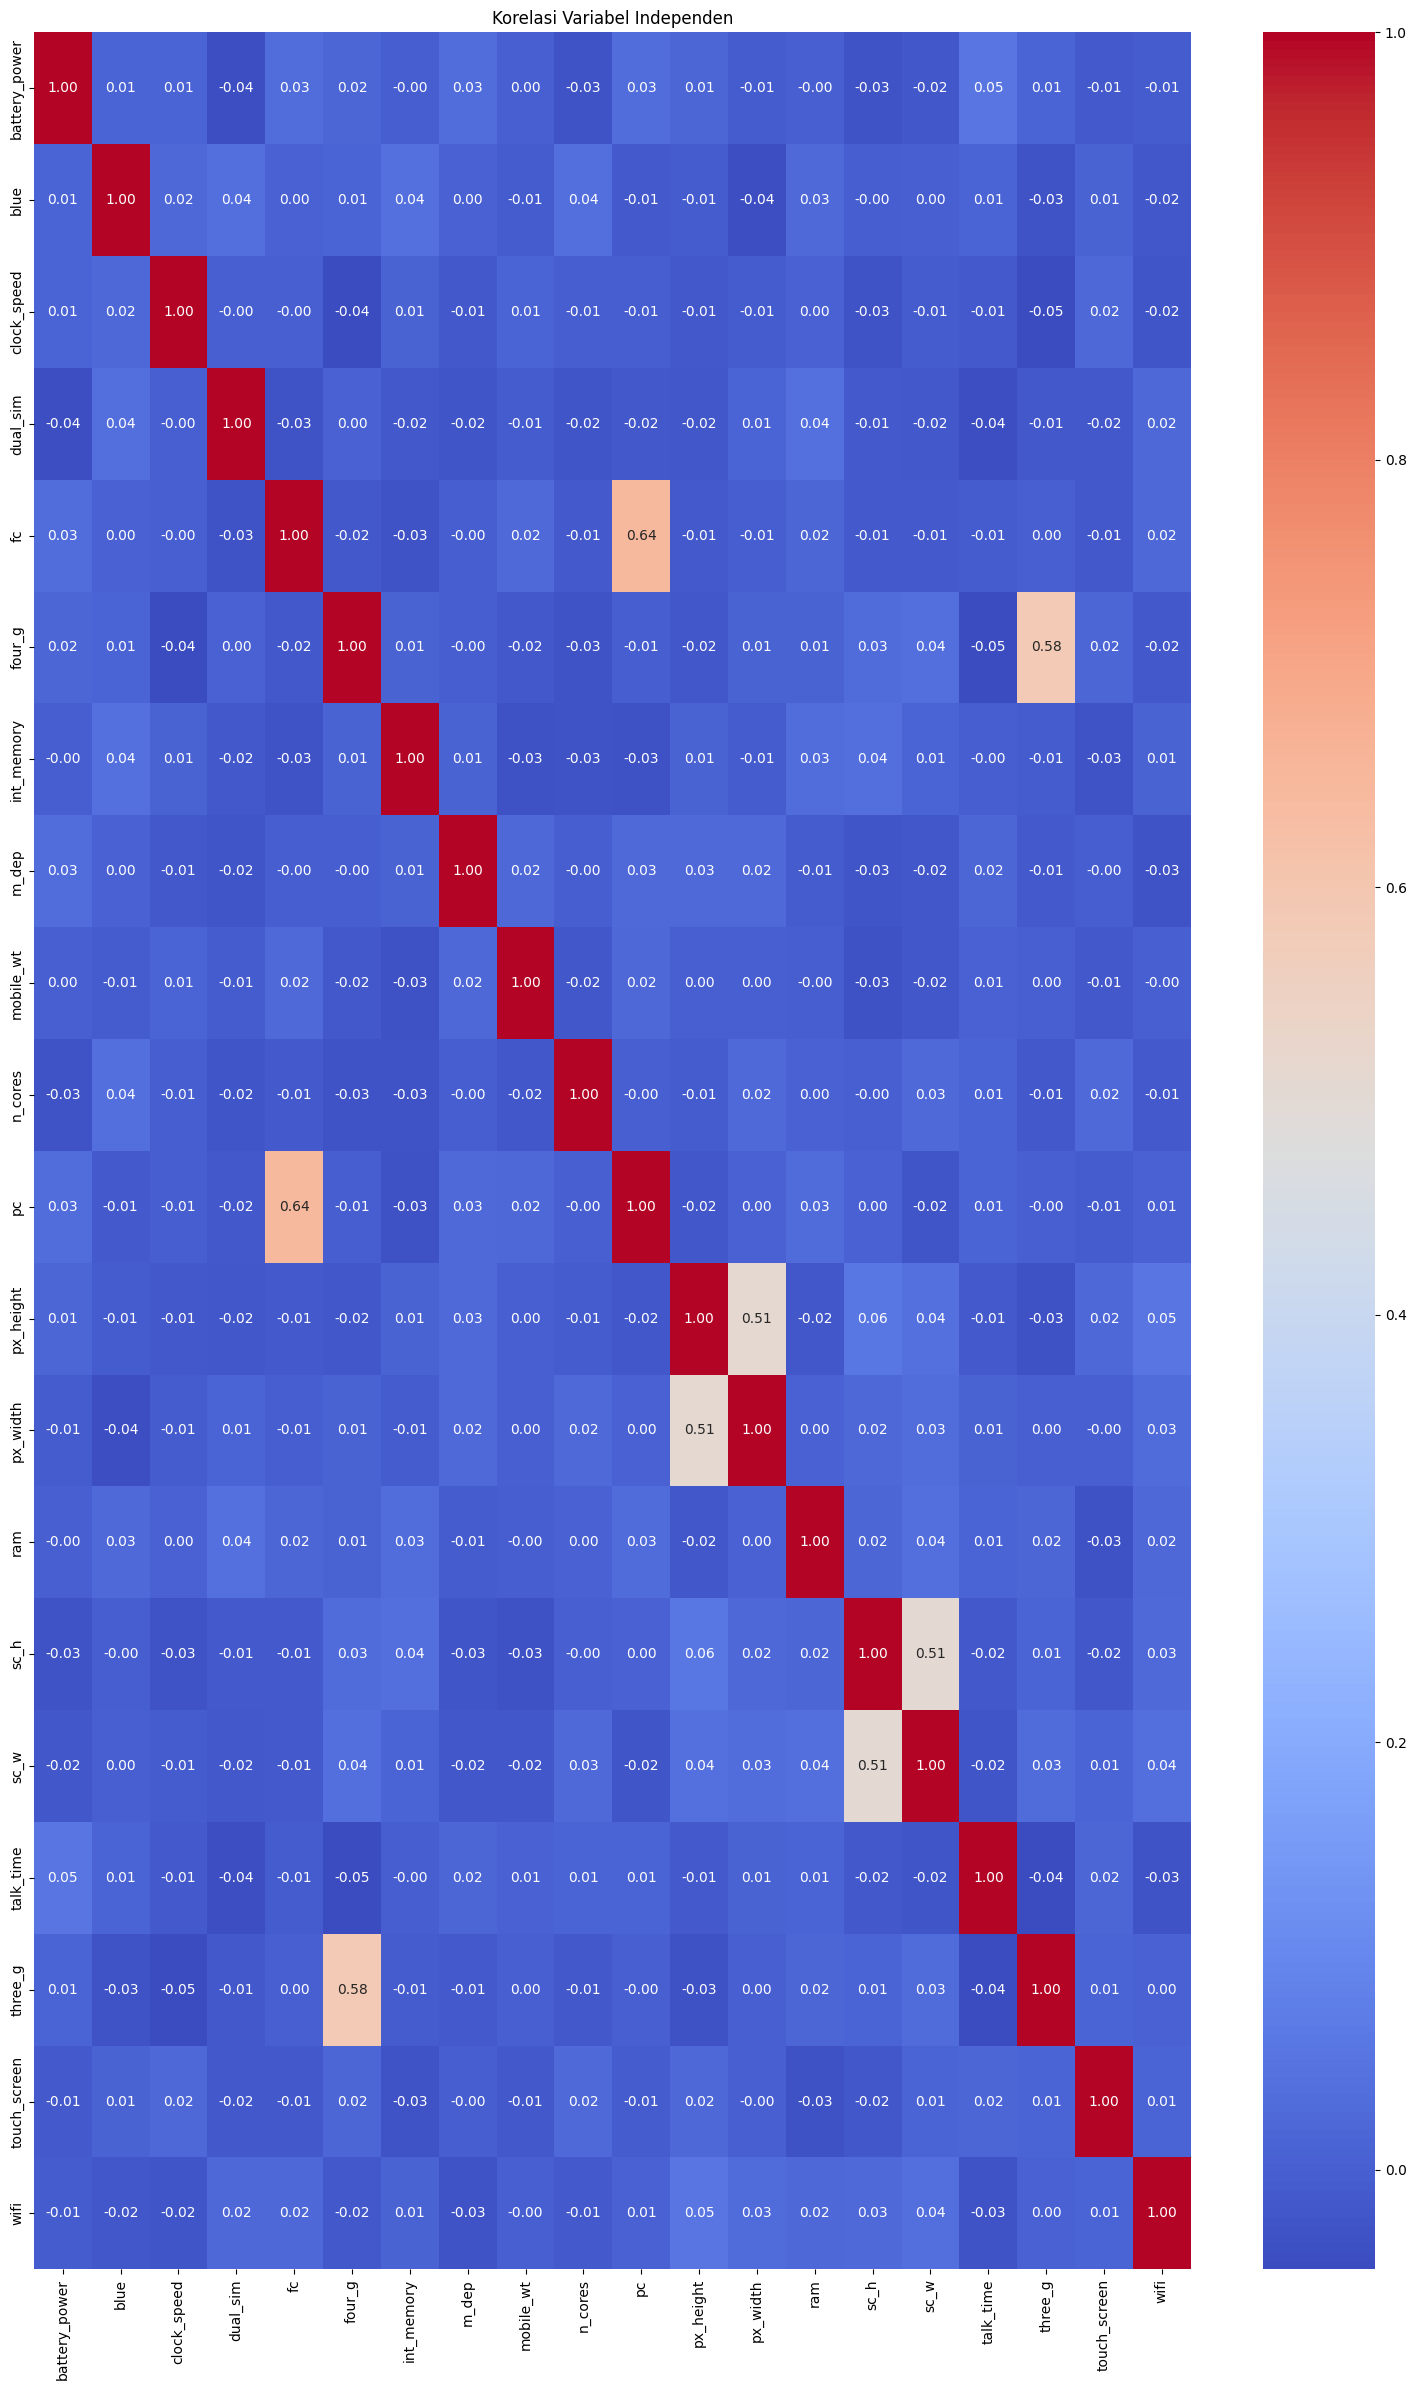

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbs
plt.figure(figsize=(15,24))
sbs.heatmap(data_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Variabel Independen')
plt.tight_layout()
plt.show()

Splitting Data dan Scaling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = dataset.drop(columns={'price_range', 'price_labeled'})
y = dataset['price_range']

X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42, stratify=y)
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)

X_Train_scaled = pd.DataFrame(X_Train_scaled)
X_Test_scaled = pd.DataFrame(X_Test_scaled)


Modelling -SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, precision_recall_curve
)
import pandas as pd

svc = SVC(random_state=42, probability=True)
param = {
    'C': [0.001,0.1,0.003,0.02,0.15,0.13],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
model = GridSearchCV(estimator=svc, param_grid=param, scoring='roc_auc_ovr_weighted',n_jobs=-1,cv=cv, verbose=2)
model.fit(X_Train_scaled, y_train)

best_parameter = model.best_estimator_
print('Parameter Terbaik : ', best_parameter)
y_res = best_parameter.predict(X_Test_scaled)
y_proba = best_parameter.predict_proba(X_Test_scaled)
accuracy_s = accuracy_score(y_test, y_res)
f1_s = f1_score(y_test,y_res, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
all_report = classification_report(y_test,y_res)

result_svc = pd.DataFrame({
    'Model' : 'Support Vector C',
    'Accuracy Score': [accuracy_s],
    'F1-Score': [f1_s],
    'ROC/AUC': [roc_auc],
    'Classication Report': [all_report]
})

print('Accuracy Score: ', accuracy_s)
print('F-1 Score: ', f1_s)
print('ROC/AUC :', roc_auc)
print('All-Report: ', all_report)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Parameter Terbaik :  SVC(C=0.15, kernel='linear', probability=True, random_state=42)
Accuracy Score:  0.95
F-1 Score:  0.9497478466550632
ROC/AUC : 0.9975
All-Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.96      0.94      0.95        50
           2       0.94      0.88      0.91        50
           3       0.91      1.00      0.95        50

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, precision_recall_curve
)
import pandas as pd

rf = RandomForestClassifier(random_state=42, bootstrap=True)
param = {
    'n_estimators':[100,200,300,400,500],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[10,20,5,15],
    'min_samples_split':[30,40,20,15],
    'min_samples_leaf':[20,10,15,30],
    'max_features':['sqrt','log2',None]
}
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
model = GridSearchCV(estimator=rf, param_grid=param, scoring='roc_auc_ovr_weighted',n_jobs=-1,cv=cv, verbose=2)
model.fit(X_Train_scaled, y_train)

best_parameter = model.best_estimator_
print('Parameter Terbaik : ', best_parameter)
y_res = best_parameter.predict(X_Test_scaled)
y_proba = best_parameter.predict_proba(X_Test_scaled)
accuracy_s = accuracy_score(y_test, y_res)
f1_s = f1_score(y_test,y_res, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
all_report = classification_report(y_test,y_res)

result_rf = pd.DataFrame({
    'Model' : 'Random Forest',
    'Accuracy Score': [accuracy_s],
    'F1-Score': [f1_s],
    'ROC/AUC': [roc_auc],
    'Classication Report': [all_report]
})

print('Accuracy Score: ', accuracy_s)
print('F-1 Score: ', f1_s)
print('ROC/AUC :', roc_auc)
print('All-Report: ', all_report)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
Parameter Terbaik :  RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=300, random_state=42)
Accuracy Score:  0.94
F-1 Score:  0.9403755005974145
ROC/AUC : 0.9957333333333335
All-Report:                precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.92      0.92      0.92        50
           2       0.89      0.94      0.91        50
           3       0.98      0.94      0.96        50

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

